# LATAR BELAKANG

Sebuah perusahaan yang menjual berbagai kebutuhan pokok seperti makanan baru saja mendapatkan pendanaan segar, mereka ingin melakukan campaign besar-besaran terhadap pelanggan mereka. Perusahaan ini melakukan evaluasi terhadap campaign dan produk-produk namun belum mengetahui karakteristik mayoritas pelanggan mereka seperti apa.

# PERNYATAAN MASALAH

Perusahaan ingin mengetahui **mayoritas customer dengan karakteristik seperti apa yang tepat untuk campaign berikutnya**. Informasi ini akan membantu perusahaan untuk dapat merumuskan dan menargetkan campaign yang tepat dan dapat memaksimalkan profit. 

Sebagai seorang *data analyst*, kita akan mencoba menjawab pertanyaan berikut:

**Seperti apa karakteristik mayoritas pelanggan yang kita miliki dan seperti apa bentuk campaign serta produk dan dimana penjualan akan lebih dimaksimalkan?**

# DATA


In [164]:
# Analysis
import pandas as pd
import numpy as np
from datetime import date, datetime

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings("ignore")

Dataset ini berisikan infromasi mengenai demografis customer, jumlah yang dihabiskan di setiap kategori produk, campaign yang berhasil diambil oleh customer, serta dimana customer mengakses dan membeli produk kita berasal.

Mari kita lihat penjelasan kolom yang ada dan dataframenya di bawah ini:

### People
- ID: ID unik untuk setiap customer
- Year_Birth: Tahun kelahiran customer
- Education: Tingkat edukasi setiap customer
- Marital_Status: Status pernikahan setiap customer
- Income: Pendapatan rumah tangga tahunan customer
- Kidhome: Jumlah anak dalam rumah tangga customer
- Teenhome: Jumlah remaja dalam rumah tangga customer
- Dt_Customer: Tanggal pendaftaran pertama customer dengan perusahaan
- Recency: Jumlah hari sejak pembelian terakhir customer
- Complain: 1 jika pelanggan mengeluh dalam 2 tahun terakhir, 0 sebaliknya

### Products
- MntWines: Jumlah yang dihabiskan untuk wine dalam 2 tahun terakhir
- MntFruits: Jumlah yang dihabiskan untuk buah-buahan dalam 2 tahun terakhir
- MntMeatProducts: Jumlah yang dihabiskan untuk daging dalam 2 tahun terakhir
- MntFishProducts: Jumlah yang dihabiskan untuk membeli ikan dalam 2 tahun terakhir
- MntSweetProducts: Jumlah yang dihabiskan untuk permen dalam 2 tahun terakhir
- MntGoldProds: Jumlah yang dihabiskan untuk emas dalam 2 tahun terakhir

### Promotion
- AcceptedCmp1: 1 jika pelanggan menerima penawaran di kampanye pertama, 0 jika tidak
- AcceptedCmp2: 1 jika pelanggan menerima tawaran di kampanye ke-2, 0 jika tidak
- AcceptedCmp3: 1 jika pelanggan menerima tawaran di kampanye ke-3, 0 jika tidak
- AcceptedCmp4: 1 jika pelanggan menerima tawaran di kampanye ke-4, 0 jika tidak
- AcceptedCmp5: 1 jika pelanggan menerima tawaran di kampanye ke-5, 0 jika tidak
- Response: 1 jika pelanggan menerima penawaran di kampanye terakhir, 0 sebaliknya

### Place
- NumDealsPurchases: Jumlah pembelian yang dilakukan dengan diskon
- NumWebPurchases: Jumlah pembelian yang dilakukan melalui website perusahaan
- NumCatalogPurchases: Jumlah pembelian yang dilakukan menggunakan katalog
- NumStorePurchases: Jumlah pembelian dilakukan langsung di toko
- NumWebVisitsMonth: Jumlah kunjungan ke situs web perusahaan dalam sebulan terakhir

In [165]:
df = pd.read_csv('marketing_capstone.csv')
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


## **DATA UNDERSTANDING**

Pada tahap *data understanding* ini, kita dapat mengenal dataset kita lebih jauh sebelum masuk ke dalam analisis. Pada proses ini, kita dapat mengetahui anomali-anomali apa saja yang terdapat di dalam dataset kita dan perlu ditangani dalam tahapan *data cleaning*. Setiap penangan anomali yang dilakukan, akan disertai dengan justifikasi langkah yang diambil, baik secara *domain knowledge* maupun secara statistik.

Pertama, mari kita lihat informasi umum dari dataset customer personality.

In [166]:
# Memeriksa jumlah baris dan kolom pada dataset
print(f'Dataset df memiliki jumlah baris dan kolom sebanyak: {df.shape}')

Dataset df memiliki jumlah baris dan kolom sebanyak: (2240, 29)


In [167]:
# Menemukan informasi dasar tentang dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

- Di sini kita hanya memiliki 3 tipe data *object* dan sisanya numerikal seperti *int64* dan *float64*.
- Kolom `Dt_Customer` bertipe *object* data, dimana `Dt_Customer` berisikan value yang mengindikasikan tanggal pertama kali customer enroll dengan perusahaan yang bisa kita ubah menjadi format *datetime*.

In [168]:
# Convert the 'Dt_Customer' column into a datetime
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

In [169]:
# Memeriksa jumlah unique value dari setiap kolom
df.nunique()

ID                     2240
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1974
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

- Pada dataset df, kolom `Z_CostContact` dan `Z_Revenue` memiliki nilai yang sama di semua baris. Sebagai langkah untuk memudahkan analisa, kita bisa menghapus kolom tersebut.

In [170]:
df=df.drop(columns=["Z_CostContact", "Z_Revenue"],axis=1)
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,3,6,5,0,0,0,0,0,0,0


In [171]:
# Memeriksa data duplikat
df[df.duplicated()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response


In [172]:
# Memeriksa statistical summary dari dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


### **Feature Enginering**

In [173]:
# Memeriksa unique value dari kolom Education
display(df['Education'].unique())

# Memeriksa unique value dari kolom Marital Status
display(df['Marital_Status'].unique())

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [174]:
# Mengelompokkan background pendidikan menjadi 'Doctor Degree', 'Master Degree' dan 'Bachelor Degree'
df['Education'] = df['Education'].replace(['PhD'], 'Doctor Degree')
df['Education'] = df['Education'].replace(['2n Cycle', 'Master'], 'Master Degree')
df['Education'] = df['Education'].replace(['Basic', 'Graduation'], 'Bachelor Degree')

# Mengelompokkan status pernikahan menjadi 'Relationship' dan 'Single'
df['Marital_Status'] = df['Marital_Status'].replace(['Married', 'Together'], 'Relationship')
df['Marital_Status'] = df['Marital_Status'].replace(['Divorced', 'Widow', 'Alone', 'YOLO', 'Absurd'], 'Single')

# Menambahkan kolom 'Age' yang menunjukan umur customer sekarang
df["Age"] = 2023 - df["Year_Birth"]

# Mengelompokkan umur menjadi beberapa kategori 
# (Age 1-17= 'Under 18', Age 18-28= 'Young Adult', Age 29-43 = 'Adult', Age 44-64= 'Middle Aged', Age 65-90= 'Senior Citizen')
df['Age_Group'] = pd.cut(x = df['Age'], bins = [1, 17, 24, 44, 64, 150], labels = ['Under 18','Young adult', 'Adult', 'Middle Aged', 'Senior Citizen'])

# Menambahkan kolom 'Children' yang menunjukan jumlah anak yang tinggal di rumah
df["Children"] = df["Kidhome"] + df["Teenhome"]

# Untuk memperjelas, kolom Produk akan kita permudah penamaannya
df = df.rename(columns={"MntWines": "Wines", "MntFruits":"Fruits", "MntMeatProducts":"Meat", "MntFishProducts":"Fish", 
"MntSweetProducts":"Sweets", "MntGoldProds":"Gold"})

# Menambahkan kolom total expenses dari berbagi macam produk
df['Expenses'] = df['Wines'] + df['Fruits'] + df['Meat'] + df['Fish'] + df['Sweets'] + df['Gold']

df.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Wines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Age_Group,Children,Expenses
0,5524,1957,Bachelor Degree,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,0,1,66,Senior Citizen,0,1617
1,2174,1954,Bachelor Degree,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,0,0,69,Senior Citizen,2,27
2,4141,1965,Bachelor Degree,Relationship,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,0,58,Middle Aged,0,776
3,6182,1984,Bachelor Degree,Relationship,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,0,0,39,Adult,1,53
4,5324,1981,Doctor Degree,Relationship,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,0,42,Adult,1,422


### **Missing Value**

In [175]:
# Memeriksa missing value yang ada di dataset
def missing_data(df):
    total = df.isnull().sum().sort_values(ascending = False)
    Percentage = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, Percentage], axis=1, keys=['Total', 'Percentage'])
missing_data(df)

,Total,Percentage
Income,24,1.071429
ID,0,0.000000
NumWebPurchases,0,0.000000
Children,0,0.000000
Age_Group,0,0.000000
Age,0,0.000000
Response,0,0.000000
Complain,0,0.000000
AcceptedCmp2,0,0.000000
AcceptedCmp1,0,0.000000


In [176]:
# Memeriksa di row mana saja NaN berada
df[df.Income.isna()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Wines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Age_Group,Children,Expenses
10,1994,1983,Bachelor Degree,Relationship,NaN,1,0,2013-11-15,11,5,...,0,0,0,0,0,0,40,Adult,1,19
27,5255,1986,Bachelor Degree,Single,NaN,1,0,2013-02-20,19,5,...,0,0,0,0,0,0,37,Adult,1,637
43,7281,1959,Doctor Degree,Single,NaN,0,0,2013-11-05,80,81,...,0,0,0,0,0,0,64,Middle Aged,0,186
48,7244,1951,Bachelor Degree,Single,NaN,2,1,2014-01-01,96,48,...,0,0,0,0,0,0,72,Senior Citizen,3,124
58,8557,1982,Bachelor Degree,Single,NaN,1,0,2013-06-17,57,11,...,0,0,0,0,0,0,41,Adult,1,46
71,10629,1973,Master Degree,Relationship,NaN,1,0,2012-09-14,25,25,...,0,0,0,0,0,0,50,Middle Aged,1,109
90,8996,1957,Doctor Degree,Relationship,NaN,2,1,2012-11-19,4,230,...,0,0,0,0,0,0,66,Senior Citizen,3,603
91,9235,1957,Bachelor Degree,Single,NaN,1,1,2014-05-27,45,7,...,0,0,0,0,0,0,66,Senior Citizen,2,18
92,5798,1973,Master Degree,Relationship,NaN,0,0,2013-11-23,87,445,...,0,0,0,0,0,0,50,Middle Aged,0,985
128,8268,1961,Doctor Degree,Relationship,NaN,0,1,2013-07-11,23,352,...,0,0,0,0,0,0,62,Middle Aged,1,404


- Pada kolom `income` terdapat 24 atau 1% dari total values yang ada di kolom tersebut berisikan NaN.

- Kita akan mengisi missing values pada kolom `Income` menggunakan median berdasarkan kategori yang ada pada kolom `Education`.

In [177]:
grouped = df.groupby('Education')

for name, group in grouped:
    median_income = group['Income'].median()
    for index, row in group.iterrows():
        if pd.isnull(row['Income']):
            df.loc[index, 'Income'] = median_income

In [178]:
# Memeriksa missing values yang ada di tiap kolom kembali
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
Wines                  0
Fruits                 0
Meat                   0
Fish                   0
Sweets                 0
Gold                   0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Response               0
Age                    0
Age_Group              0
Children               0
Expenses               0
dtype: int64

In [179]:
display(df.loc[df['Income'] > 600000])
display(df.loc[df['Age'] > 90])

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Wines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Age_Group,Children,Expenses
2233,9432,1977,Bachelor Degree,Relationship,666666.0,1,0,2013-06-02,23,9,...,0,0,0,0,0,0,46,Middle Aged,1,62


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Wines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Age_Group,Children,Expenses
192,7829,1900,Master Degree,Single,36640.0,1,0,2013-09-26,99,15,...,0,0,0,0,1,0,123,Senior Citizen,1,65
239,11004,1893,Master Degree,Single,60182.0,0,1,2014-05-17,23,8,...,0,0,0,0,0,0,130,Senior Citizen,1,22
339,1150,1899,Doctor Degree,Relationship,83532.0,0,0,2013-09-26,36,755,...,0,1,0,0,0,0,124,Senior Citizen,0,1853


In [180]:
# Drop incorrect format dengan menetapkan batasan pada 'Age' dan 'Income'.
df = df[(df["Age"]<90)]
df = df[(df["Income"]<600000)]
print("Jumlah data setelah menghapus incorrect format adalah:", len(df))

Jumlah data setelah menghapus incorrect format adalah: 2236


# CLEAN DATA

In [181]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'unique', 'uniqueSample'],
                     data=listItem)
print(df.shape)
dfDesc

(2236, 31)


,dataFeatures,dataType,null,unique,uniqueSample
0,ID,int64,0,2236,"[5423, 6720]"
1,Year_Birth,int64,0,56,"[1982, 1996]"
2,Education,object,0,3,"[Master Degree, Bachelor Degree]"
3,Marital_Status,object,0,2,"[Single, Relationship]"
4,Income,float64,0,1971,"[60585.0, 24762.0]"
5,Kidhome,int64,0,3,"[2, 0]"
6,Teenhome,int64,0,3,"[1, 0]"
7,Dt_Customer,datetime64[ns],0,663,"[2013-07-22T00:00:00.000000000, 2014-01-14T00:..."
8,Recency,int64,0,100,"[21, 30]"
9,Wines,int64,0,775,"[504, 1279]"


In [182]:
# Save file for tableu
df.to_csv('Capstone2.csv')

# DATA ANALYSIS

Setelah melakukan _data cleaning_. Sekarang, kita dapat memulai melakukan analisis untuk mencari tahu **bagaimana karakteristik customer yang cocok untuk sebuah campaign**.  

## **Karakteristik Pelanggan**

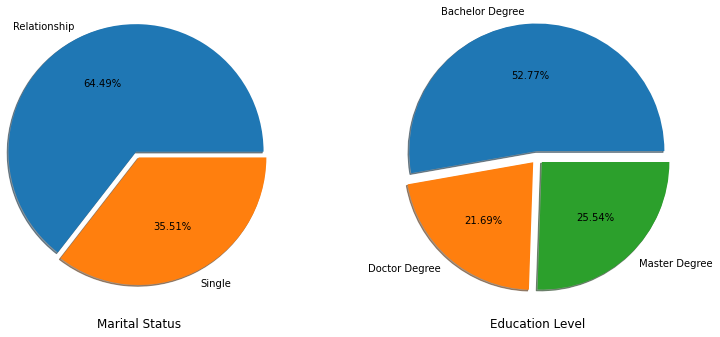

In [183]:
# Proportion of Maritial Status & Education levels
cust_count = df.groupby("Marital_Status").count()['Age']
label = df.groupby('Marital_Status').count()['Age'].index
fig, ax = plt.subplots(1, 2, figsize = (10, 12))
ax[0].pie(cust_count, labels=label, shadow=True, autopct='%1.2f%%',radius=2, explode=(0.1, 0))
ax[0].set_title('Marital Status', y=-0.6)

cust_count = df.groupby("Education").count()['Age']
label = df.groupby('Education').count()['Age'].index
ax[1].pie(cust_count, labels=label, shadow=True, autopct='%1.2f%%',radius=2, explode=(0.1, 0.1, 0.1))
ax[1].set_title('Education Level', y=-0.6)
plt.subplots_adjust(wspace = 1.5, hspace =0)
plt.show()

- 2 gambar di atas memberikan gambaran sekilas tentang distribusi pelanggan, kita dapat melihat sebagian besar pelanggan (64%) menjalin hubungan dan sebagian besar (52%) memiliki gelar Bachelor Degree.

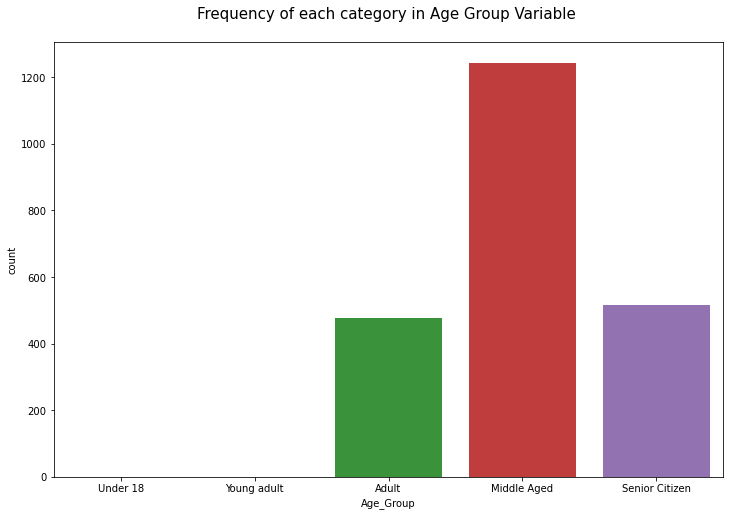

In [184]:
plt.figure(figsize=(12, 8))
sns.countplot(df["Age_Group"])
plt.title("Frequency of each category in Age Group Variable \n", size=15);

- Gambar di atas menunjukan bahwa sebagaian besar pelanggan kita tergolong Middle Aged (44-60) tahun.

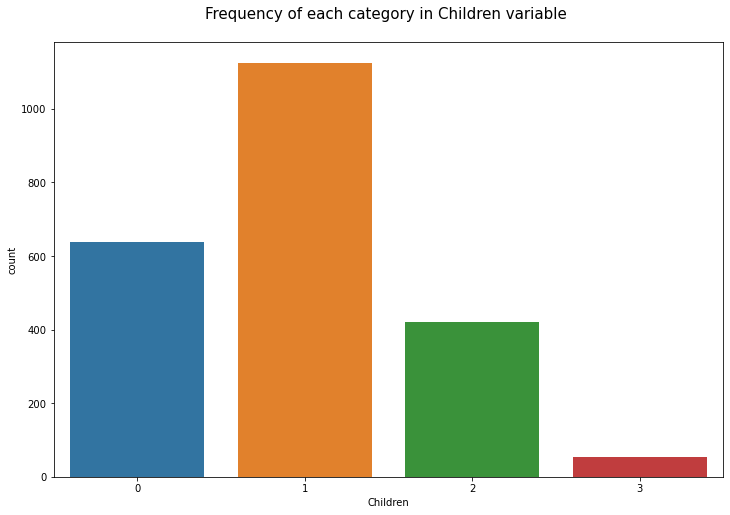

In [185]:
plt.figure(figsize=(12, 8))
sns.countplot(df["Children"])
plt.title("Frequency of each category in Children variable \n", size=15);

- Gambar di atas menunjukan bahwa sebagian besar pelanggan kita setidaknya memiliki 1 anak dan tidak ada yang memiliki lebih dari 3 anak.
- Dengan begitu, pengeluaran pelanggan kita seharusnya jauh lebih banyak berada pada pelanggan yang memiliki anak dibandingkan dengan yang tidak memiliki anak.

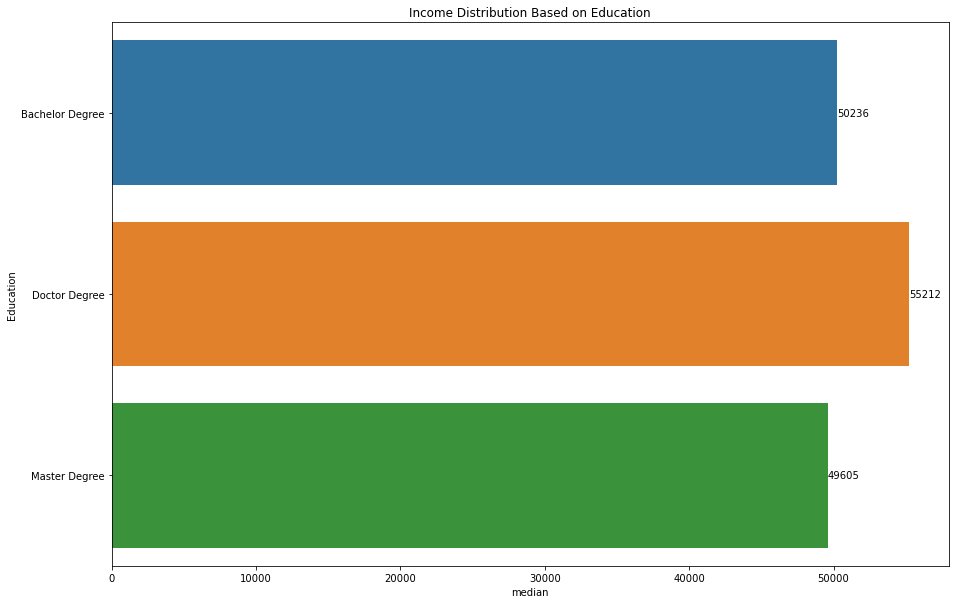

In [186]:
edcome = df.groupby('Education')['Income'].median().reset_index(name='median')
plt.figure(figsize=(15,10))
TBT = sns.barplot(data= edcome, y='Education', x='median')
plt.title('Income Distribution Based on Education')
for container in TBT.containers:
    TBT.bar_label(container)

- Income paling banyak berada pada pelanggan dengan gelar pendidikan Doctor Degree.
- Hal tersebut normal terjadi karena semakin tinggi pendidikan seseorang, semakin tinggi juga pendapatannya.

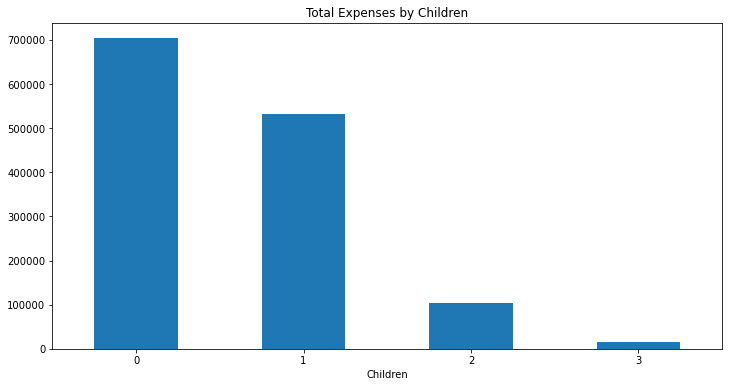

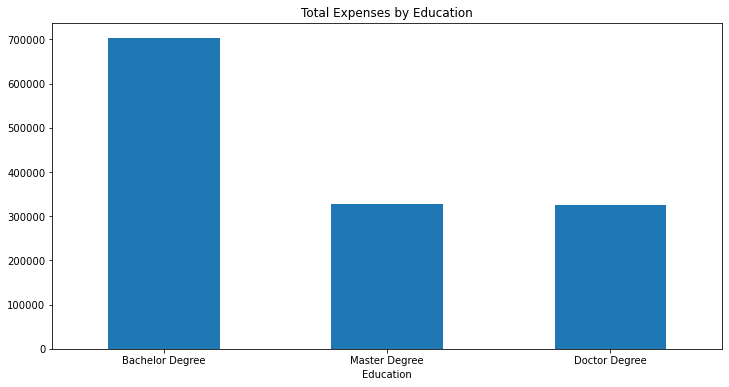

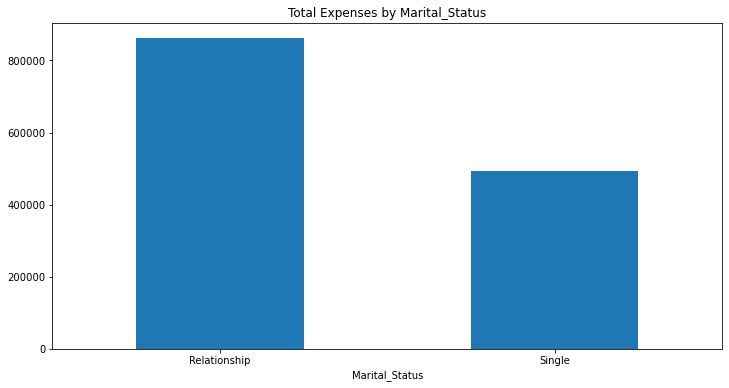

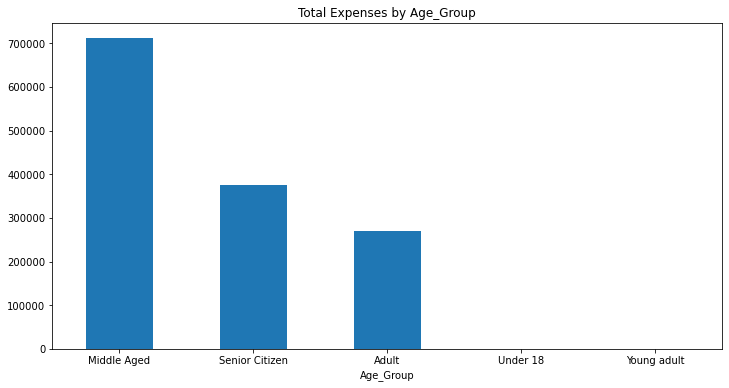

In [187]:
for col in ['Children', 'Education', 'Marital_Status', 'Age_Group']:
    df[[col,'Expenses']].groupby(col).sum().sort_values(by='Expenses', ascending=False).plot(kind='bar',legend=None, figsize = (12, 6))
    plt.title('Total Expenses by ' + col)
    plt.xticks(rotation = 360)
    
    plt.show()

- Semenjak pelanggan kita mayoritas berada pada pelanggan yang memiliki 1 anak, berdasarkan gambar di atas ternyata mengatakan bahwa pengeluaran terbanyak justru ada pada pelanggan yang tidak memiliki anak.
- Pelanggan dengan gelar Bachelor Degree memiliki pengeluaran paling banyak di antara Master Degree dan Doctor Degree.
- Pelanggan yang sudah menikah memiliki pengeluaran yang lebih banyak dibanding dengan yang berstatus single.
- Pelanggan dengan golongan Middle Aged memiliki pengeluaran yang lebih banyak dibandingkan golongan usia lainnya.

Dari grafik-grafik di atas, kita bisa menjawab pertanyaan:

* Seperti apa karakteristik mayoritas pelanggan yang kita miliki?  
    * Pelanggan mayoritas kita memiliki gelar Bachelor Degree, berstatus 'Relationship' atau menikah, berusia antara 44-60 tahun, dan memiliki 1 anak.
    * Pendapatan mayoritas pelanggan kita berada pada pelanggan dengan gelar Doctor Degree.
    * Sementara pengeluaran paling banyak yang dilakukan oleh pelanggan kita berasal dari pelanggan yang memiliki Bachelor Degree, berstatus 'Relationship' atau menikah, namun tidak memiliki anak dan berusia antara 44-60 tahun.

Setelah kita mendapatkan karakteristik umum terkait mayoritas pelanggan kita, kita bisa mengaitkan karakteristik pelanggan kita dengan campaign, produk, serta dimana pembelian dari masing-masing karakteristik dilakukan pada analisa di bawah ini:

## **Karakteristik Campaign dan Purchases**

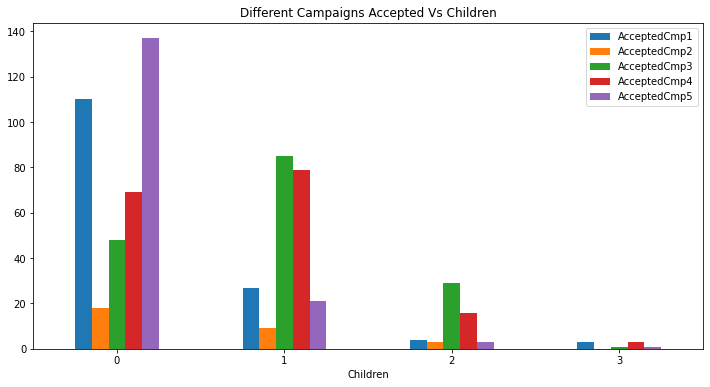

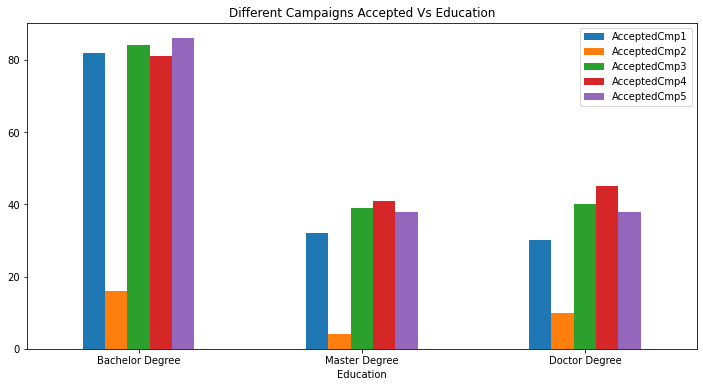

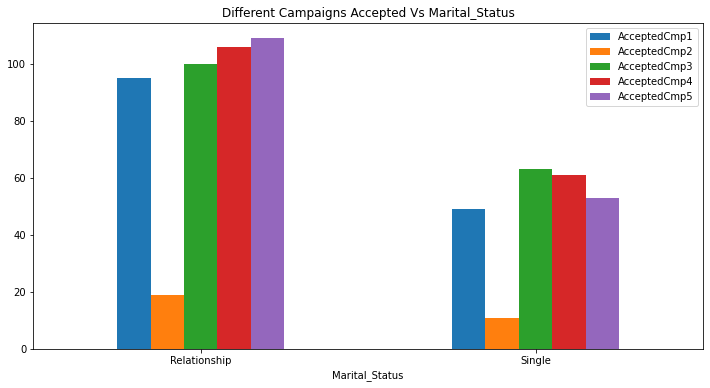

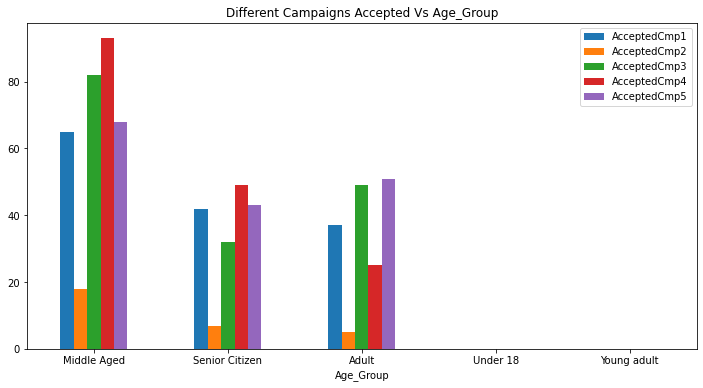

In [188]:
for col in ['Children', 'Education', 'Marital_Status', 'Age_Group']:
    df.groupby(col)[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']].sum().sort_values(by='AcceptedCmp1', ascending=False).plot(kind='bar',figsize = (12, 6))
    plt.title('Different Campaigns Accepted Vs '+col)
    plt.xticks(rotation = 360)

- Pada gambar di atas ditunjukan bahwa mayoritas pelanggan kita yang tidak memiliki anak paling banyak tertarik dengan Campaign 5, namun untuk pelanggan yang memiliki anak 1, mereka lebih tertarik kepada Campaign 3.
- Pelanggan dengan gelar Bachelor Degree tertarik kepada semua Campaign dan banyak yang tertarik kepada Campaign 5 kecuali Campaign 2 dimana sangat sedikit yang tertarik pada Campaign ini.
- Untuk pelanggan dengan Master Degree dan Doctor Degree, mayoritas tertarik kepada Campaign 3, 4, 5, namun sangat sedikit yang tertarik pada Campaign 2.
- Pelanggan yang sudah menikah memiliki ketertarikan paling banyak pada Campaign 5, 4, dan 3 jika dibandingkan dengan pelanggan yang masih single, mereka lebih tertarik pada Campaign 3, 4, 5.
- Untuk pelanggan dengan Middle Aged, mayoritas pelanggan memiliki ketertarikan pada campaign 3 jika dibandingkan dengan Senior Citizen dimana mereka lebih tertarik pada Campaign 4 serta pelanggan yang tergolong Adult lebih banyak tertarik pada Campaign 3 dan 5.

Temuan yang menarik dimana berdasarkan setiap background pelanggan yang berbeda-beda menunjukan kecenderungan untuk tertarik pada campaign yang berbeda-beda pula. Namun, di setiap karakteristik pelanggan yang berbeda, Campaign 2 terlihat tidak banyak yang tertarik.

Karena kurangnya informasi mengenai seperti apa struktur dan bentuk dari setiap Campaign, kita tidak bisa menjawab apa kekurangan dan kelebihan dari setiap Campaign yang menyebabkan pelanggan tidak tertarik pada salah satu Campaign. Untuk langkah selanjutnya, perlu informasi yang detail mengenai bentuk dan struktur seperti apa dari setiap campaign agar pertanyaan ini bisa terjawab.

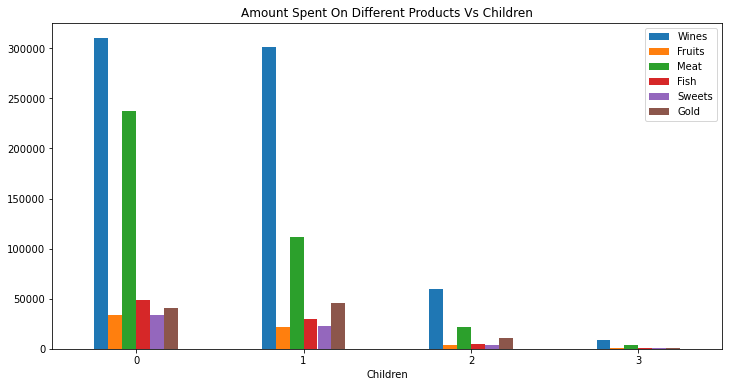

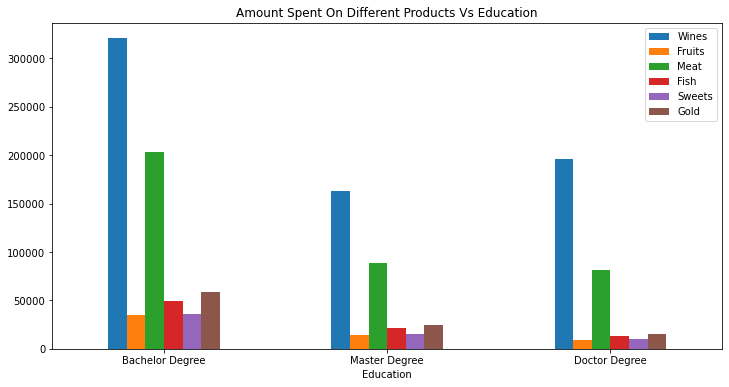

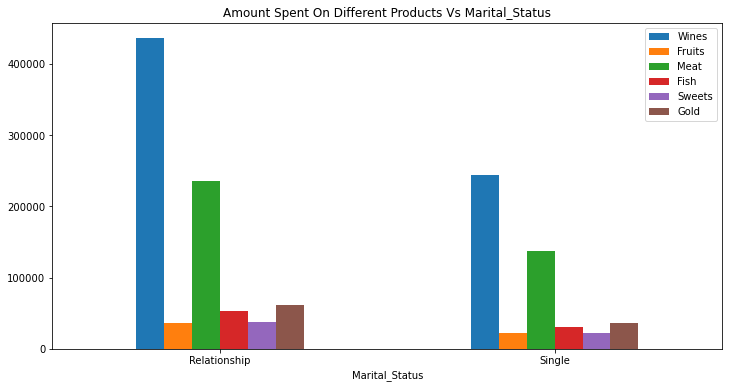

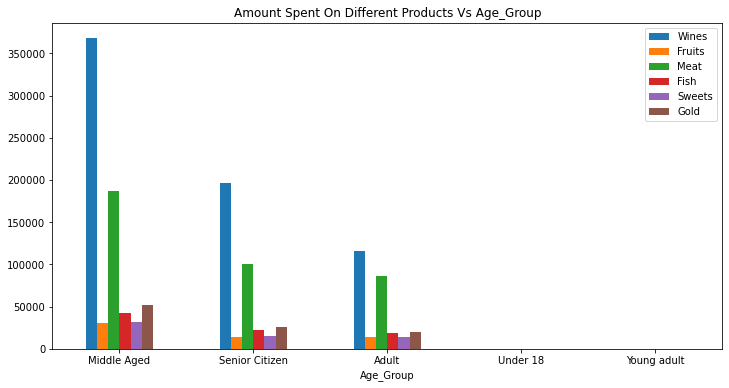

In [189]:
for col in ['Children', 'Education','Marital_Status','Age_Group']:
    
    df.groupby(col)[['Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold']].sum().sort_values(by='Sweets' , ascending=False).plot(kind='bar',figsize = (12, 6))
    plt.title('Amount Spent On Different Products Vs '+col)
    plt.xticks(rotation = 360)

- Gambar di atas menunujukan bahwa setiap karakteristik pelanggan yang berbeda-beda, semuanya menunjukan bahwa produk Meat dan Wines adalah favorit produk yang paling banyak dibeli oleh pelanggan.
- Hal ini bisa terjadi karena faktor lingkungan tempat tinggal yang membuat Wines dan Meat merupakan produk yang paling sesuai.
- Serta ada kemungkinan bahwa Wines dan Meat merupakan salah satu kebiasaan atau budaya yang ada pada tempat tinggal pelanggan.
- Meskipun begitu, perlu dilakukan analisa lebih lanjut terkait mengapa wines dan meat bisa menjadi produk yang paling banyak dibeli oleh pelanggan.

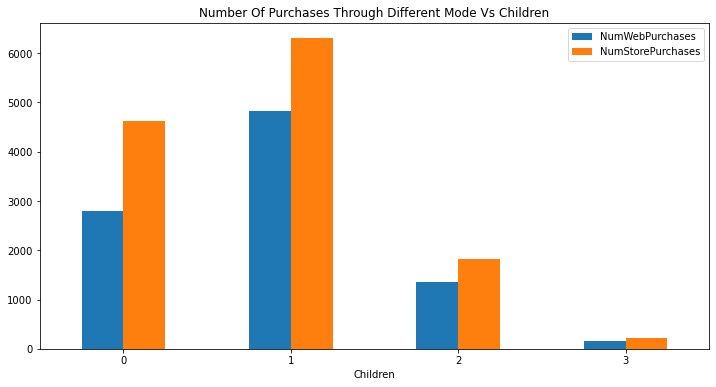

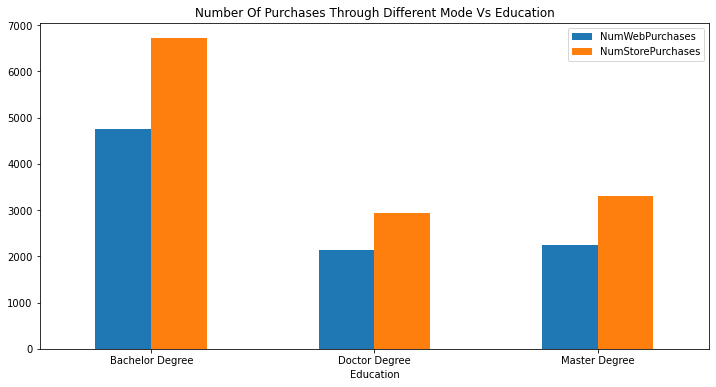

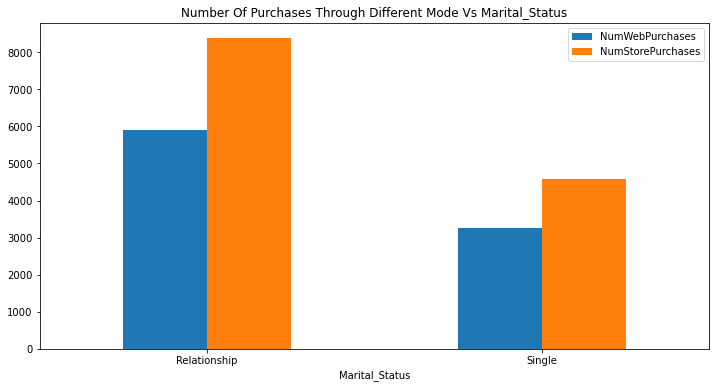

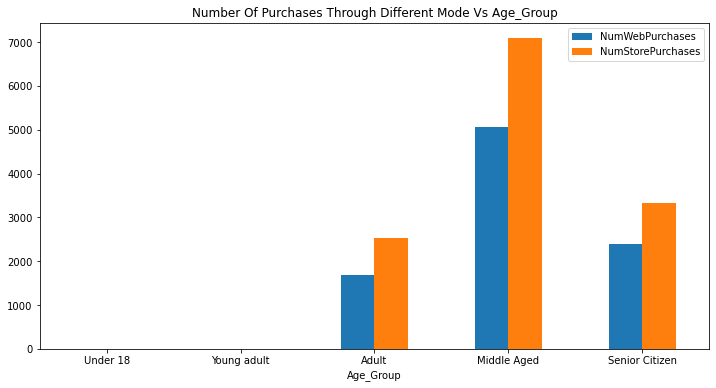

In [190]:
for col in ['Children','Education','Marital_Status','Age_Group']:
    df.groupby(col)[['NumWebPurchases', 'NumStorePurchases']].sum().plot(kind='bar',figsize = (12, 6))
    plt.title('Number Of Purchases Through Different Mode Vs '+col)
    plt.xticks(rotation = 360)
    plt.show()

- Gambar di atas menunjukan bahwa di setiap karakteristik pelanggan yang berbeda-beda, pembelian paling banyak dilakukan langsung di store.


# Kesimpulan dan Rekomendasi 

**Kesimpulan**

Dari analisis yang telah dilakukan, kita bisa membuat kesimpulan berikut tentang karakteristik mayoritas pelanggan yang dimiliki seperti apa:
* Mayoritas pelanggan memilki gelar Bachelor Degree.
* Mayoritas pelanggan berada pada usia menengah yaitu antara 44-60 tahun.
* Mayoritas pelanggan sudah menikah dan memiliki 1 anak tapi tidak lebih dari 3 anak.
* Pendapatan paling banyak dimiliki oleh pelanggan dengan gelar Doctor Degree.
* Pengeluaran terbanyak dilakukan oleh mayoritas pelanggan yang sudah menikah, tidak memiliki anak, berusia 44-60 tahun, dan memiliki gelar Bachelor Degree.

Bentuk campaign dan produk yang tepat serta dimana penjualan akan lebih dimaksimalkan, adalah sebagai berikut:
* Campaign 1, 2, 3, 4, dan 5 memiliki peminat yang berbeda-beda berdasarkan karakteristik seperti usia, status pernikahan, gelar pendidikan, dan memiliki berapa anak.
* Dari setiap karakteristik pelanggan yang berbeda-beda, hanya Campaign 2 yang sangat sedikit peminatnya.
* Produk yang paling banyak diminati oleh pelanggan adalah Meat dan Wines.
* Pembelian melalui store adalah favorit pelanggan.

**Rekomendasi**

1. Melakukan segmentasi kepada keseluruhan pelanggan agar campaign yang ingin dirumuskan dan dilakukan bisa tersalurkan dengan tepat.
2. Memaksimalkan penjualan di store dan meningkatkan awareness pelanggan kepada website perusahaan.
    * Diperlukan informasi lebih detail terkait `NumCatalogPurchases`, agar analisa dimana pembelian paling favorit dapat dilakukan
3. Campaign yang menarik
    * Semenjak mayoritas pelanggan yang kita miliki berada pada usia 44-60 tahun dan memiliki gelar Bachelor Degree, elemen seperti 'Kemudahan akses dan kecepatan' bisa dipertimbangkan ke dalam campaign yang tepat.
    * Campaign dapat dirumuskan dengan mempertimbangkan selain pemberian diskon, bundling produk antara Wine dan Meat jika melakukan pembelian produk langsung di store, karena dua produk tersebut merupakan produk yang sangat diminati oleh pelanggan.
    * Selain pemberian diskon, campaign yang bertujuan untuk meningkatkan minat pelanggan pada pembelian produk melalui website bisa dilakukan dengan memasukan layanan dimana produk yang dibeli bisa diantar dengan gratis ke alamat pelanggan pada minimal pembelian tertentu.


Dengan melakukan segmentasi kepada pelanggan dengan karakteristik yang berbeda-beda, diharapkan analisis ini bisa membantu perusahaan untuk merumuskan campaign yang tepat untuk pelanggan dan memaksimalkan profit perusahaan.